In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO
from tqdm import tqdm
import os
%matplotlib inline  

In [33]:
night_control_PR_curve_df = pd.read_csv("runs/detect/night_control/f1_curve_results.csv")
night_blended_PR_curve_df = pd.read_csv("runs/detect/night_blended/f1_curve_results.csv")

day_control_PR_curve_df = pd.read_csv("runs/detect/day_control/f1_curve_results.csv")
day_blended_PR_curve_df = pd.read_csv("runs/detect/day_blended/f1_curve_results.csv")

In [34]:
night_control_PR_curve_df.head()

,confidence,person_f1,people_f1,cyclist_f1
0,0.000000,0.335758,0.185082,0.384089
1,0.001001,0.335891,0.185111,0.384114
2,0.002002,0.427550,0.263520,0.486717
3,0.003003,0.486260,0.322604,0.548744
4,0.004004,0.527234,0.369990,0.598504


In [38]:
pr_curve_df =  pd.DataFrame()

pr_curve_df["confidence"] = night_blended_PR_curve_df.confidence 

pr_curve_df["person_control_night"] = night_control_PR_curve_df.person_f1
pr_curve_df["person_blended_night"] = night_blended_PR_curve_df.person_f1

pr_curve_df["people_control_night"] = night_control_PR_curve_df.people_f1
pr_curve_df["people_blended_night"] = night_blended_PR_curve_df.people_f1

pr_curve_df["cyclist_control_night"] = night_control_PR_curve_df.cyclist_f1
pr_curve_df["cyclist_blended_night"] = night_blended_PR_curve_df.cyclist_f1

pr_curve_df["person_control_day"] = night_control_PR_curve_df.person_f1
pr_curve_df["person_blended_day"] = night_blended_PR_curve_df.person_f1

pr_curve_df["people_control_day"] = night_control_PR_curve_df.people_f1
pr_curve_df["people_blended_day"] = night_blended_PR_curve_df.people_f1

pr_curve_df["cyclist_control_day"] = night_control_PR_curve_df.cyclist_f1
pr_curve_df["cyclist_blended_day"] = night_blended_PR_curve_df.cyclist_f1

pr_curve_df["person_control"] = (night_control_PR_curve_df.person_f1 + day_control_PR_curve_df.person_f1)/2
pr_curve_df["person_blended"] = (night_blended_PR_curve_df.person_f1 + day_blended_PR_curve_df.person_f1)/2

pr_curve_df["people_control"] = (night_control_PR_curve_df.people_f1 + day_control_PR_curve_df.people_f1)/2
pr_curve_df["people_blended"] = (night_blended_PR_curve_df.people_f1 + day_blended_PR_curve_df.people_f1)/2

pr_curve_df["cyclist_control"] = (night_control_PR_curve_df.cyclist_f1 + day_control_PR_curve_df.cyclist_f1)/2
pr_curve_df["cyclist_blended"] = (night_blended_PR_curve_df.cyclist_f1 + day_blended_PR_curve_df.cyclist_f1)/2



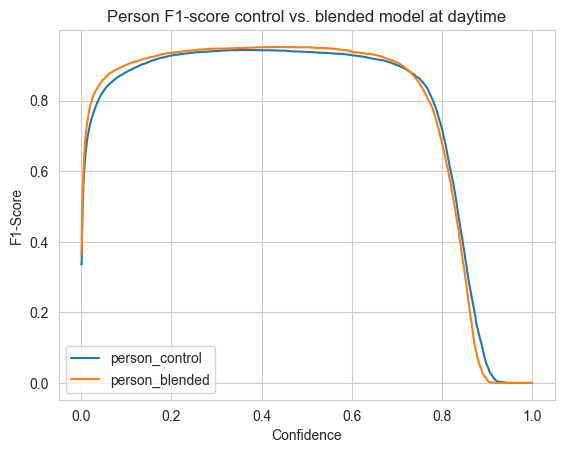

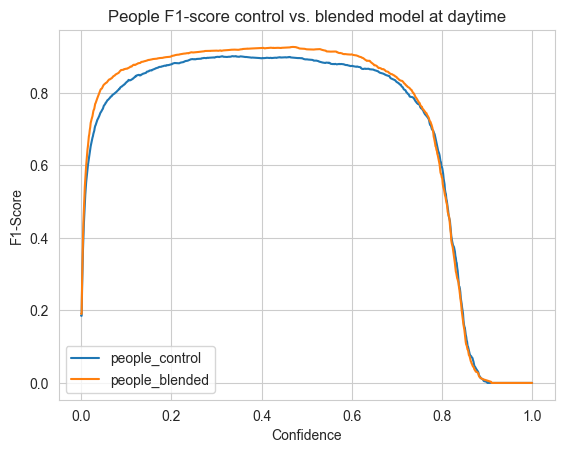

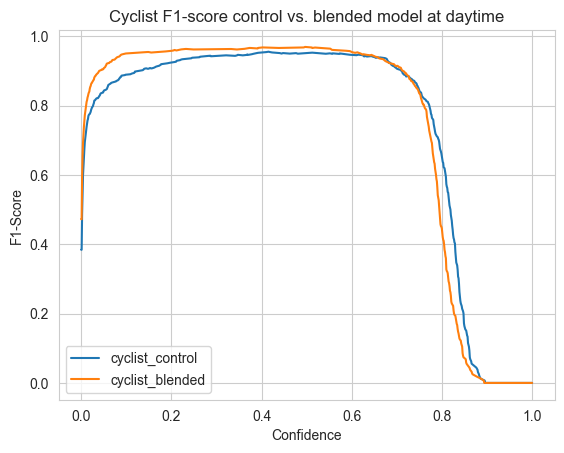

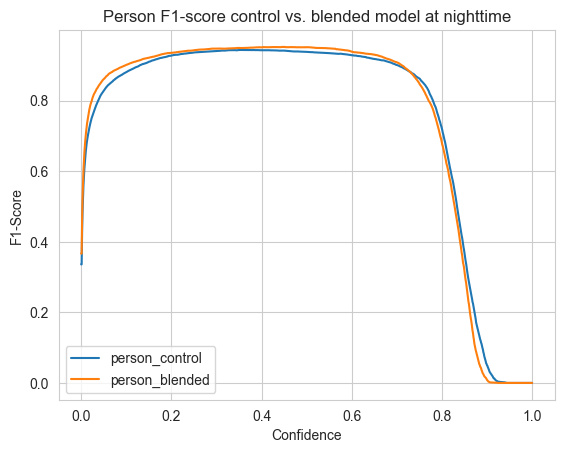

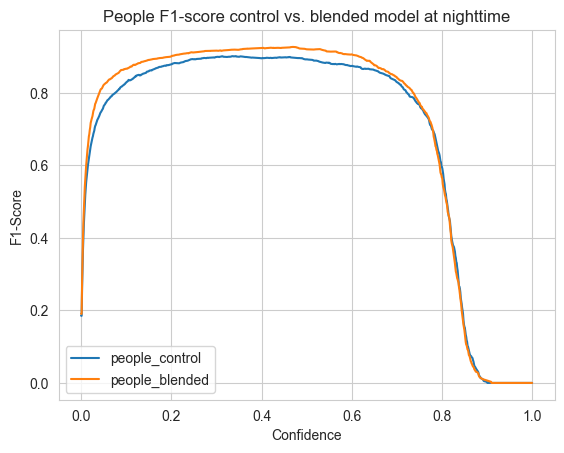

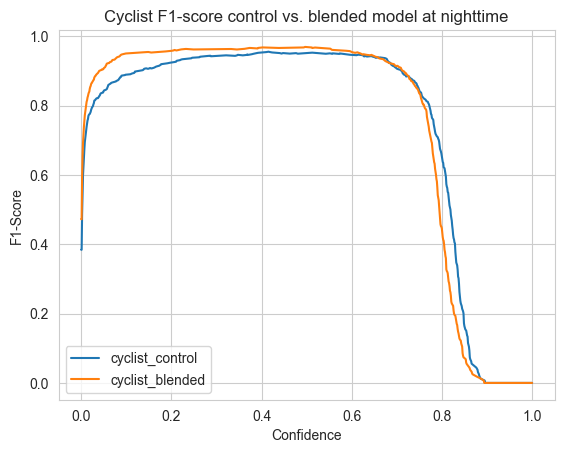

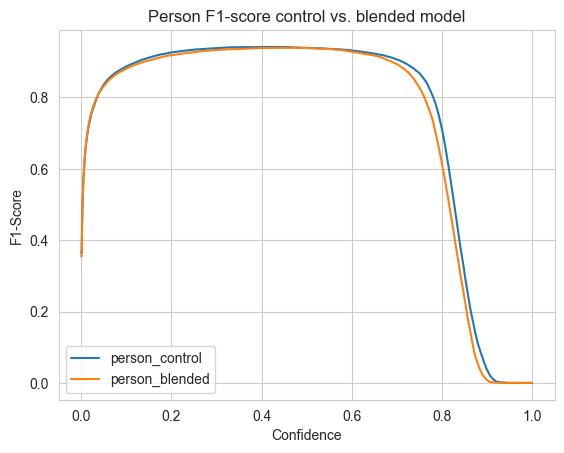

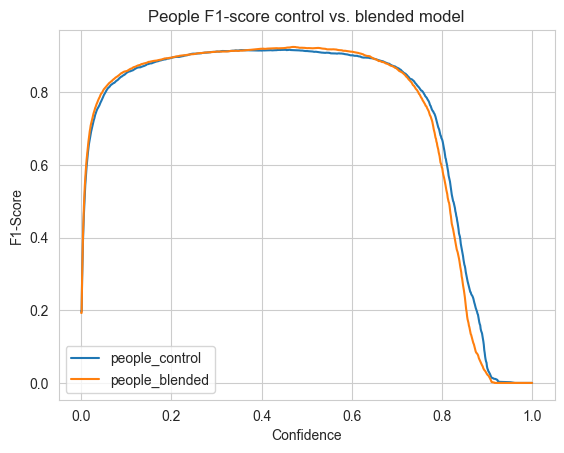

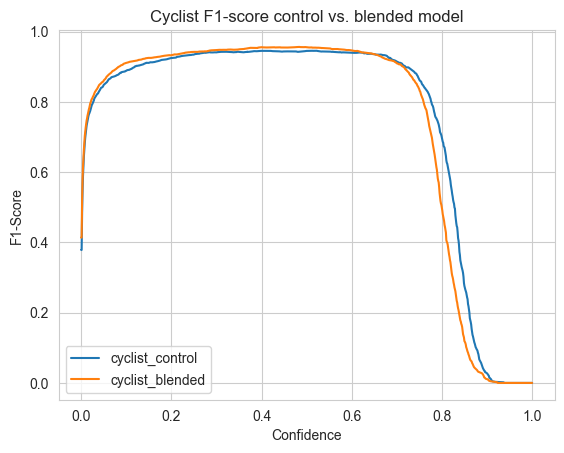

In [39]:
# Set the style
sns.set_style("whitegrid")

# Create the line plot
sns.lineplot(x="confidence", y="person_control_day", data=pr_curve_df, label="person_control")
sns.lineplot(x="confidence", y="person_blended_day", data=pr_curve_df, label="person_blended")

# Set labels and title
plt.xlabel('Confidence')
plt.ylabel('F1-Score')
plt.legend()
plt.title('Person F1-score control vs. blended model at daytime')

# Show the plot
plt.show()

# Create the line plot
sns.lineplot(x="confidence", y="people_control_day", data=pr_curve_df, label="people_control")
sns.lineplot(x="confidence", y="people_blended_day", data=pr_curve_df, label="people_blended")

# Set labels and title
plt.xlabel('Confidence')
plt.ylabel('F1-Score')
plt.legend()
plt.title('People F1-score control vs. blended model at daytime')

# Show the plot
plt.show()

# Create the line plot
sns.lineplot(x="confidence", y="cyclist_control_day", data=pr_curve_df, label="cyclist_control")
sns.lineplot(x="confidence", y="cyclist_blended_day", data=pr_curve_df, label="cyclist_blended")

# Set labels and title
plt.xlabel('Confidence')
plt.ylabel('F1-Score')
plt.legend()
plt.title('Cyclist F1-score control vs. blended model at daytime')

# Show the plot
plt.show()

# Create the line plot
sns.lineplot(x="confidence", y="person_control_night", data=pr_curve_df, label="person_control")
sns.lineplot(x="confidence", y="person_blended_night", data=pr_curve_df, label="person_blended")

# Set labels and title
plt.xlabel('Confidence')
plt.ylabel('F1-Score')
plt.legend()
plt.title('Person F1-score control vs. blended model at nighttime')

# Show the plot
plt.show()

# Create the line plot
sns.lineplot(x="confidence", y="people_control_night", data=pr_curve_df, label="people_control")
sns.lineplot(x="confidence", y="people_blended_night", data=pr_curve_df, label="people_blended")

# Set labels and title
plt.xlabel('Confidence')
plt.ylabel('F1-Score')
plt.legend()
plt.title('People F1-score control vs. blended model at nighttime')

# Show the plot
plt.show()

# Create the line plot
sns.lineplot(x="confidence", y="cyclist_control_night", data=pr_curve_df, label="cyclist_control")
sns.lineplot(x="confidence", y="cyclist_blended_night", data=pr_curve_df, label="cyclist_blended")

# Set labels and title
plt.xlabel('Confidence')
plt.ylabel('F1-Score')
plt.legend()
plt.title('Cyclist F1-score control vs. blended model at nighttime')

# Show the plot
plt.show()


# Create the line plot
sns.lineplot(x="confidence", y="person_control", data=pr_curve_df, label="person_control")
sns.lineplot(x="confidence", y="person_blended", data=pr_curve_df, label="person_blended")

# Set labels and title
plt.xlabel('Confidence')
plt.ylabel('F1-Score')
plt.legend()
plt.title('Person F1-score control vs. blended model')

# Show the plot
plt.show()

# Create the line plot
sns.lineplot(x="confidence", y="people_control", data=pr_curve_df, label="people_control")
sns.lineplot(x="confidence", y="people_blended", data=pr_curve_df, label="people_blended")

# Set labels and title
plt.xlabel('Confidence')
plt.ylabel('F1-Score')
plt.legend()
plt.title('People F1-score control vs. blended model')

# Show the plot
plt.show()

# Create the line plot
sns.lineplot(x="confidence", y="cyclist_control", data=pr_curve_df, label="cyclist_control")
sns.lineplot(x="confidence", y="cyclist_blended", data=pr_curve_df, label="cyclist_blended")

# Set labels and title
plt.xlabel('Confidence')
plt.ylabel('F1-Score')
plt.legend()
plt.title('Cyclist F1-score control vs. blended model')

# Show the plot
plt.show()


In [40]:
mean_results_night_control_df = pd.read_csv("runs/detect/night_control/mean_results.csv")
mean_results_night_blended_df = pd.read_csv("runs/detect/night_blended/mean_results.csv")

In [41]:
mean_results_night_control_df.head()

,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),fitness,metrics/mAP50_person,metrics/mAP50_people,metrics/mAP50_cyclist,metrics/mAP50-95_person,metrics/mAP50-95_people,metrics/mAP50-95_cyclist
0,0.947497,0.916189,0.958873,0.682918,0.710514,0.969705,0.921195,0.98572,0.728538,0.672495,0.647722


In [42]:
night_class_mean_values_df = pd.DataFrame()
night_class_mean_values_df["precision"] = [mean_results_night_control_df["metrics/precision(B)"].values[0], mean_results_night_blended_df["metrics/precision(B)"].values[0]]
night_class_mean_values_df["recall"] = [mean_results_night_control_df["metrics/recall(B)"].values[0], mean_results_night_blended_df["metrics/recall(B)"].values[0]]
night_class_mean_values_df["mAP50"] = [mean_results_night_control_df["metrics/mAP50(B)"].values[0], mean_results_night_blended_df["metrics/mAP50(B)"].values[0]]
night_class_mean_values_df["mAP50-95"] = [mean_results_night_control_df["metrics/mAP50-95(B)"].values[0], mean_results_night_blended_df["metrics/mAP50-95(B)"].values[0]]
night_class_mean_values_df["model"] = ["control","blended"]

map_night_class_df = pd.DataFrame()
map_night_class_df["mAP50"] = [mean_results_night_control_df["metrics/mAP50_person"].values[0],
                               mean_results_night_control_df["metrics/mAP50_people"].values[0],
                               mean_results_night_control_df["metrics/mAP50_cyclist"].values[0],
                               mean_results_night_blended_df["metrics/mAP50_person"].values[0],
                               mean_results_night_blended_df["metrics/mAP50_people"].values[0],
                               mean_results_night_blended_df["metrics/mAP50_cyclist"].values[0]]

map_night_class_df["mAP50-95"] = [mean_results_night_control_df["metrics/mAP50-95_person"].values[0],
                                  mean_results_night_control_df["metrics/mAP50-95_people"].values[0],
                                  mean_results_night_control_df["metrics/mAP50-95_cyclist"].values[0],
                                  mean_results_night_blended_df["metrics/mAP50-95_person"].values[0],
                                  mean_results_night_blended_df["metrics/mAP50-95_people"].values[0],
                                  mean_results_night_blended_df["metrics/mAP50-95_cyclist"].values[0],]

map_night_class_df["model"] = ["control","control","control","blended","blended","blended"]
map_night_class_df["class"] = ["person", "people", "cyclist","person", "people", "cyclist"]

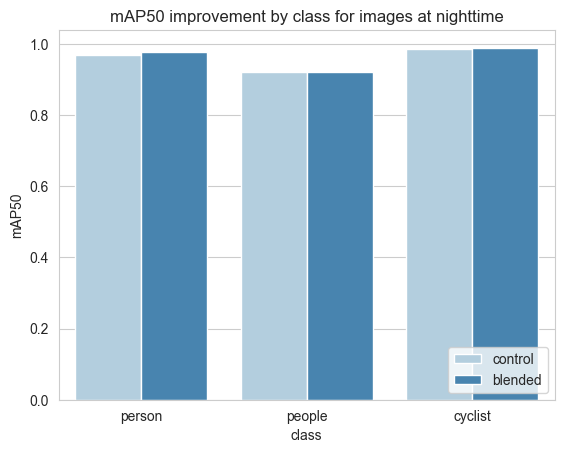

In [43]:
sns.set_style("whitegrid")
sns.barplot(x = 'class',
            y = 'mAP50',
            hue="model",
            data = map_night_class_df,
            palette="Blues")
plt.legend(loc="lower right")
plt.title("mAP50 improvement by class for images at nighttime")
plt.show()

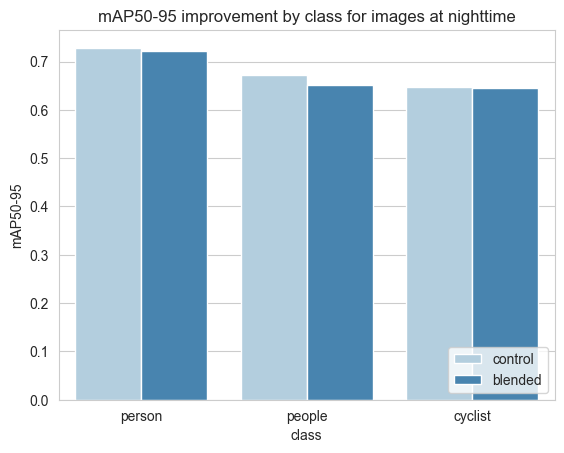

In [44]:
sns.set_style("whitegrid")
sns.barplot(x = 'class',
            y = 'mAP50-95',
            hue="model",
            data = map_night_class_df,
            palette="Blues")
plt.legend(loc="lower right")
plt.title("mAP50-95 improvement by class for images at nighttime")
plt.show()

In [45]:
occ_0_control_df = pd.read_csv("runs/detect/occ_0_control/mean_results.csv")
occ_0_blended_df = pd.read_csv("runs/detect/occ_0_blended/mean_results.csv")

occ_1_control_df = pd.read_csv("runs/detect/occ_1_control/mean_results.csv")
occ_1_blended_df = pd.read_csv("runs/detect/occ_1_blended/mean_results.csv")

occ_2_control_df = pd.read_csv("runs/detect/occ_2_control/mean_results.csv")
occ_2_blended_df = pd.read_csv("runs/detect/occ_2_blended/mean_results.csv")

In [58]:
occ_2_control_df.head()

,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),fitness,metrics/mAP50_person,metrics/mAP50-95_person
0,0.799454,0.802198,0.85773,0.544682,0.575986,0.85773,0.544682


In [60]:
occ_class_df = pd.DataFrame()
occ_class_df["mAP50"] = [occ_0_control_df["metrics/mAP50_person"].values[0],
                         occ_1_control_df["metrics/mAP50_person"].values[0],
                         occ_2_control_df["metrics/mAP50_person"].values[0],
                         occ_0_blended_df["metrics/mAP50_person"].values[0],
                         occ_1_blended_df["metrics/mAP50_person"].values[0],
                         occ_2_blended_df["metrics/mAP50_person"].values[0],
                         ]

occ_class_df["mAP50-95"] = [occ_0_control_df["metrics/mAP50-95_person"].values[0],
                            occ_1_control_df["metrics/mAP50-95_person"].values[0],
                            occ_2_control_df["metrics/mAP50-95_person"].values[0],
                            occ_0_blended_df["metrics/mAP50-95_person"].values[0],
                            occ_1_blended_df["metrics/mAP50-95_person"].values[0],
                            occ_2_blended_df["metrics/mAP50-95_person"].values[0],
                         ]


occ_class_df["Precision"] = [occ_0_control_df["metrics/precision(B)"].values[0],
                             occ_1_control_df["metrics/precision(B)"].values[0],
                             occ_2_control_df["metrics/precision(B)"].values[0],
                             occ_0_blended_df["metrics/precision(B)"].values[0],
                             occ_1_blended_df["metrics/precision(B)"].values[0],
                             occ_2_blended_df["metrics/precision(B)"].values[0],
                         ]


occ_class_df["Recall"] = [occ_0_control_df["metrics/recall(B)"].values[0],
                          occ_1_control_df["metrics/recall(B)"].values[0],
                          occ_2_control_df["metrics/recall(B)"].values[0],
                          occ_0_blended_df["metrics/recall(B)"].values[0],
                          occ_1_blended_df["metrics/recall(B)"].values[0],
                          occ_2_blended_df["metrics/recall(B)"].values[0],
                         ]


occ_class_df["Fitness score"] = [occ_0_control_df["fitness"].values[0],
                                 occ_1_control_df["fitness"].values[0],
                                 occ_2_control_df["fitness"].values[0],
                                 occ_0_blended_df["fitness"].values[0],
                                 occ_1_blended_df["fitness"].values[0],
                                 occ_2_blended_df["fitness"].values[0],
                         ]

occ_class_df["model"] = ["control","control","control","blended","blended","blended"]
occ_class_df["Occlusion"] = ["No occlusion","Partial occlusion","Heavy occlusion","No occlusion","Partial occlusion","Heavy occlusion"]


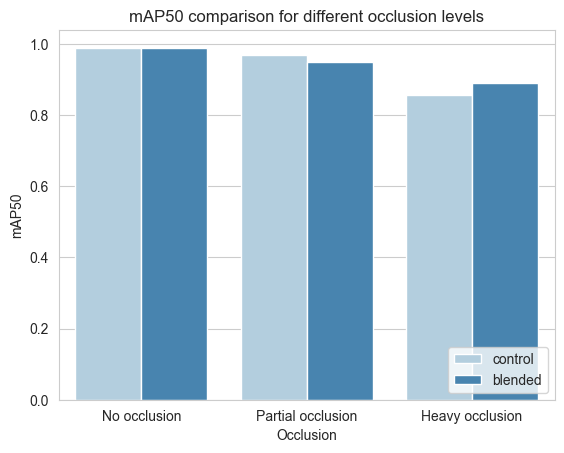

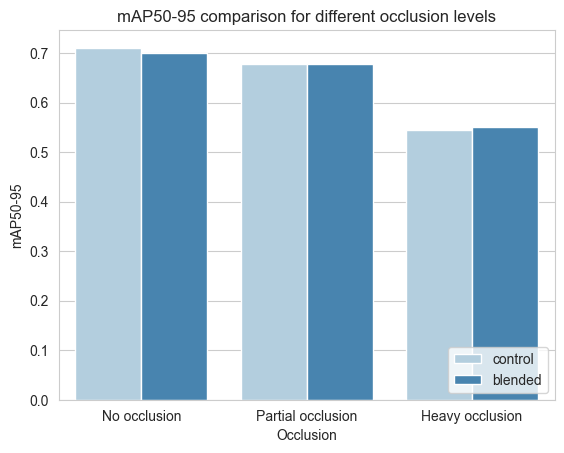

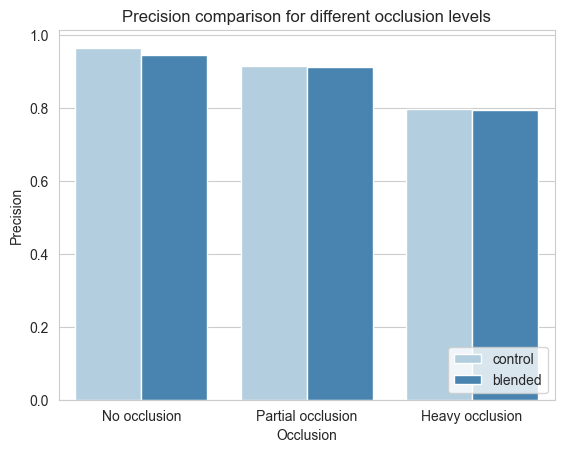

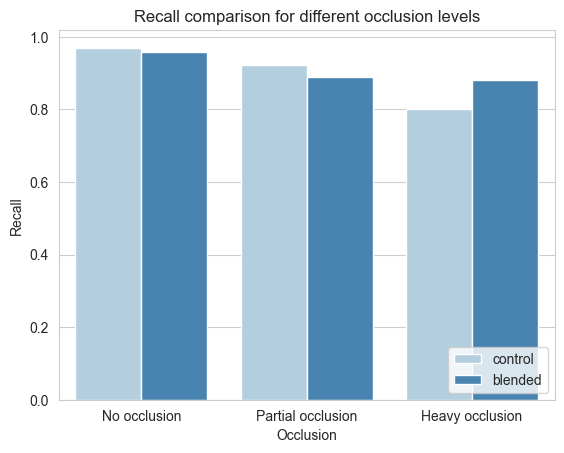

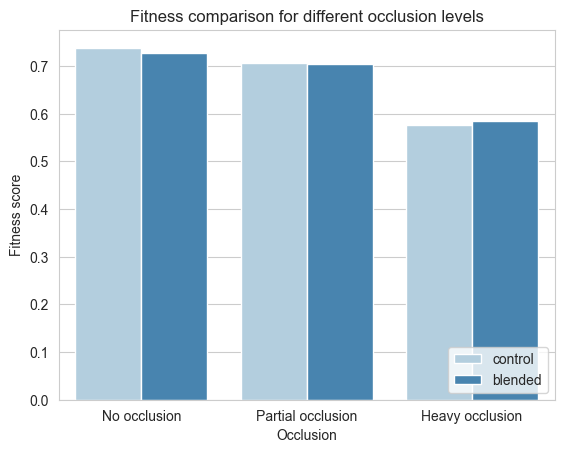

In [61]:
sns.set_style("whitegrid")
sns.barplot(x = 'Occlusion',
            y = 'mAP50',
            hue="model",
            data = occ_class_df,
            palette="Blues")
plt.legend(loc="lower right")
plt.title("mAP50 comparison for different occlusion levels")
plt.show()

sns.barplot(x = 'Occlusion',
            y = 'mAP50-95',
            hue="model",
            data = occ_class_df,
            palette="Blues")
plt.legend(loc="lower right")
plt.title("mAP50-95 comparison for different occlusion levels")
plt.show()

sns.barplot(x = 'Occlusion',
            y = 'Precision',
            hue="model",
            data = occ_class_df,
            palette="Blues")
plt.legend(loc="lower right")
plt.title("Precision comparison for different occlusion levels")
plt.show()

sns.barplot(x = 'Occlusion',
            y = 'Recall',
            hue="model",
            data = occ_class_df,
            palette="Blues")
plt.legend(loc="lower right")
plt.title("Recall comparison for different occlusion levels")
plt.show()

sns.barplot(x = 'Occlusion',
            y = 'Fitness score',
            hue="model",
            data = occ_class_df,
            palette="Blues")
plt.legend(loc="lower right")
plt.title("Fitness comparison for different occlusion levels")
plt.show()
